## Galáxias barradas e interações 2

Este notebook possui cálculos para melhor caracterizar uma galáxia não barrada interagindo com um satélite (galáxia anã) a partir de t = 8 Gyr. Os cálculos aqui apresentados são de: força da barra, desvio padrão de velocidades verticais e radiais, órbita do satélite e mapas de altura e velocidade. Algumas funções importadas estão escritas em bar_funcs.py

Andressa Wille, 11/08/2023

Aqui estamos usando:

    - Galáxia sem gás e com 20% de bojo
    
    +
    
    - Galáxias anãs satélites
    
com massas $ M = 1 \times 10^{10}\mathrm{{M}_\odot}, M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, M = 0.1 \times 10^{10}\mathrm{{M}_\odot}$ e raios orbitais de $r = 10 \, \mathrm{kpc}, r = 20 \, \mathrm{kpc}, r = 30 \, \mathrm{kpc}$, orbitando a galáxia maior a partir de $t=8$ Gyr.

In [2]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np
from scipy import stats
import math
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import savgol_filter
from bar_funcs import *

In [3]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [4]:
#caminhos galáxia + satélite
path_01_10 = 'satelites/sat01-10/'
path_01_20 = 'satelites/sat01-20/'
path_01_30 = 'satelites/sat01-30/'
path_05_10 = 'satelites/sat05-10/'
path_05_20 = 'satelites/sat05-20/'
path_05_30 = 'satelites/sat05-30/'
path_1_10 = 'satelites/sat1-10/'
path_1_20 = 'satelites/sat1-20/'
path_1_30 = 'satelites/sat1-30/'

paths = [path_01_10, path_01_20, path_01_30, path_05_10, path_05_20, path_05_30, path_1_10, path_1_20, path_1_30]

In [5]:
n_snapshots = 120

### Força da barra

In [8]:
#arrays de tempo
time_01_10 = np.empty(n_snapshots)
time_01_20 = np.empty(n_snapshots)
time_01_30 = np.empty(n_snapshots)

time_05_10 = np.empty(n_snapshots)
time_05_20 = np.empty(n_snapshots)
time_05_30 = np.empty(n_snapshots)

time_1_10 = np.empty(n_snapshots)
time_1_20 = np.empty(n_snapshots)
time_1_30 = np.empty(n_snapshots)

In [9]:
#arrays para força da barra
A2_01_10 = np.empty(n_snapshots)
A2_01_20 = np.empty(n_snapshots)
A2_01_30 = np.empty(n_snapshots)

A2_05_10 = np.empty(n_snapshots)
A2_05_20 = np.empty(n_snapshots)
A2_05_30 = np.empty(n_snapshots)

A2_1_10 = np.empty(n_snapshots)
A2_1_20 = np.empty(n_snapshots)
A2_1_30 = np.empty(n_snapshots)

In [10]:
#tempo
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time_01_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 1:
            time_01_20[j] = round(f['Header'].attrs['Time'], 2)    
        
        if p == 2:
            time_01_30[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 3:
            time_05_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 4:
            time_05_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 5:
            time_05_30[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 6:
            time_1_10[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 7:
            time_1_20[j] = round(f['Header'].attrs['Time'], 2)
            
        if p == 8:
            time_1_30[j] = round(f['Header'].attrs['Time'], 2)

In [11]:
#força da barra
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

        #calcular força da barra
        if p == 0:
            A2_01_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 1:
            A2_01_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 2:
            A2_01_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 3:
            A2_05_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 4:
            A2_05_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 5:
            A2_05_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 6:
            A2_1_10[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 7:
            A2_1_20[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)
        if p == 8:
            A2_1_30[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)

In [6]:
#caminhos
path = 'barrada/'
paths1 = [path]

In [7]:
n_snapshots_ = 281

In [14]:
#arrays para força da barra
time = np.empty(n_snapshots_)
A2 = np.empty(n_snapshots_)

In [15]:
#força da barra
for p, path in enumerate(paths1):

    for j in range (0, n_snapshots_):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            time[j] = 0.0 + round(f['Header'].attrs['Time'], 2)

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)

        #calcular força da barra
        if p == 0:
            A2[j] = bar_strength(m=m_disk, x=x_new_disk, y=y_new_disk, Rmax=15.0, Nbins=30, 
                                    n_snapshots=n_snapshots)           

In [16]:
time_01_10 = 8.0 + time_01_10
time_01_20 = 8.0 + time_01_20
time_01_30 = 8.0 + time_01_30
time_05_10 = 8.0 + time_05_10
time_05_20 = 8.0 + time_05_20
time_05_30 = 8.0 + time_05_30
time_1_10 = 8.0 + time_1_10
time_1_20 = 8.0 + time_1_20
time_1_30 = 8.0 + time_1_30

In [17]:
print(f'A2 final isolada: {round(A2[280],2)}')

print(f'A2 final sat 01 10: {round(A2_01_10[119],2)}')
print(f'A2 final sat 01 20: {round(A2_01_20[119],2)}')
print(f'A2 final sat 01 30: {round(A2_01_30[119],2)}')

print(f'A2 final sat 05 10: {round(A2_05_10[119],2)}')
print(f'A2 final sat 05 20: {round(A2_05_20[119],2)}')
print(f'A2 final sat 05 30: {round(A2_05_30[119],2)}')

print(f'A2 final sat 1 10: {round(A2_1_10[119],2)}')
print(f'A2 final sat 1 20: {round(A2_1_20[119],2)}')
print(f'A2 final sat 1 30: {round(A2_1_30[119],2)}')

A2 final isolada: 0.65
A2 final sat 01 10: 0.65
A2 final sat 01 20: 0.66
A2 final sat 01 30: 0.66
A2 final sat 05 10: 0.38
A2 final sat 05 20: 0.39
A2 final sat 05 30: 0.38
A2 final sat 1 10: 0.06
A2 final sat 1 20: 0.09
A2 final sat 1 30: 0.1


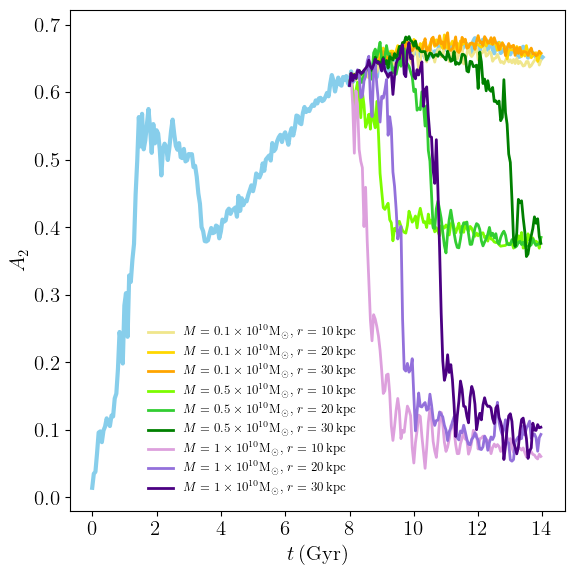

In [18]:
plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, A2, color='skyblue', lw=3)#, label='no perturbation')

plt.plot(time_01_10, A2_01_10, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, A2_01_20, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, A2_01_30, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, A2_05_10, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, A2_05_20, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, A2_05_30, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, A2_1_10, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, A2_1_20, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, A2_1_30, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=9, loc="center right", bbox_to_anchor=(0.6,0.2))
plt.tight_layout()
#plt.savefig('a2_gb_poster.png')

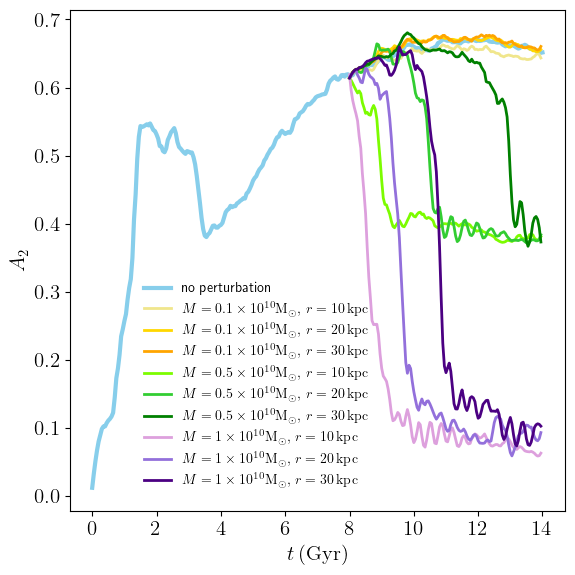

In [19]:
#curva suavizada
A2_smooth = savgol_filter(A2, window_length=9, polyorder=3)

A2_01_10_smooth = savgol_filter(A2_01_10, window_length=9, polyorder=3)
A2_01_20_smooth = savgol_filter(A2_01_20, window_length=9, polyorder=3)
A2_01_30_smooth = savgol_filter(A2_01_30, window_length=9, polyorder=3)

A2_05_10_smooth = savgol_filter(A2_05_10, window_length=9, polyorder=3)
A2_05_20_smooth = savgol_filter(A2_05_20, window_length=9, polyorder=3)
A2_05_30_smooth = savgol_filter(A2_05_30, window_length=9, polyorder=3)

A2_1_10_smooth = savgol_filter(A2_1_10, window_length=9, polyorder=3)
A2_1_20_smooth = savgol_filter(A2_1_20, window_length=9, polyorder=3)
A2_1_30_smooth = savgol_filter(A2_1_30, window_length=9, polyorder=3)


plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, A2_smooth, color='skyblue', lw=3, label='no perturbation')

plt.plot(time_01_10, A2_01_10_smooth, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, A2_01_20_smooth, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, A2_01_30_smooth, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, A2_05_10_smooth, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, A2_05_20_smooth, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, A2_05_30_smooth, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, A2_1_10_smooth, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, A2_1_20_smooth, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, A2_1_30_smooth, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

#plt.hlines(0.56, 0, 14, 'darkgrey', linestyles='dotted')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=10, loc="center right", bbox_to_anchor=(0.63,0.25))
plt.tight_layout()
#plt.savefig('a2_gb_smooth.png', dpi=200)

In [53]:
print('Atingem A2 = 0.5 em:')

t_05_10 = time_05_10[np.where(A2_05_10_smooth >= 0.5)[0]].max()
print(f'sat 05 10: {t_05_10} Gyr')

t_05_20 = time_05_20[np.where(A2_05_20_smooth >= 0.5)[0]].max()
print(f'sat 05 20: {t_05_20} Gyr')

t_05_30 = time_05_30[np.where(A2_05_30_smooth >= 0.5)[0]].max()
print(f'sat 05 30: {t_05_30} Gyr')

t_1_10 = time_1_10[np.where(A2_1_10_smooth >= 0.5)[0]].max()
print(f'sat 1 10: {t_1_10} Gyr')

t_1_20 = time_1_20[np.where(A2_1_20_smooth >= 0.5)[0]].max()
print(f'sat 1 20: {t_1_20} Gyr')

t_1_30 = time_1_30[np.where(A2_1_30_smooth >= 0.5)[0]].max()
print(f'sat 1 30: {t_1_30} Gyr')

Atingem A2 = 0.5 em:
sat 05 10: 8.9 Gyr
sat 05 20: 10.45 Gyr
sat 05 30: 12.95 Gyr
sat 1 10: 8.35 Gyr
sat 1 20: 9.3 Gyr
sat 1 30: 10.65 Gyr


In [21]:
out = [t_05_10, t_05_20, t_05_30, t_1_10, t_1_20, t_1_30]
out

[8.85, 10.4, 12.9, 8.25, 9.25, 10.45]

In [22]:
out = np.transpose([out])
name = 't_A2_queda.txt'
np.savetxt(name, out, header='t', fmt='%1.6e')

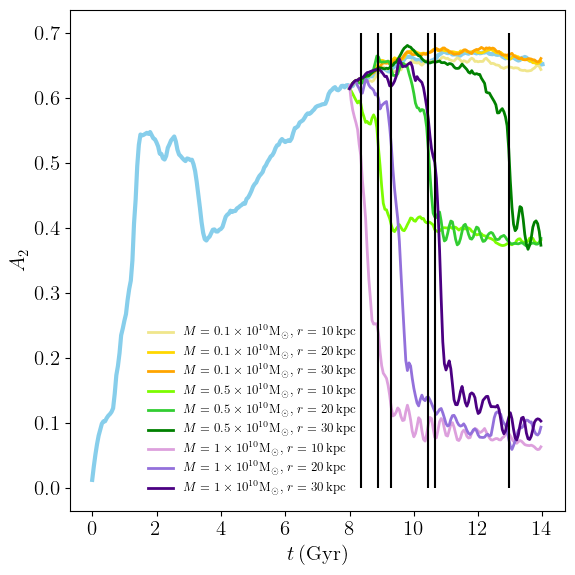

In [54]:
plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, A2_smooth, color='skyblue', lw=3)#, label='no perturbation')

plt.plot(time_01_10, A2_01_10_smooth, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, A2_01_20_smooth, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, A2_01_30_smooth, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, A2_05_10_smooth, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, A2_05_20_smooth, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, A2_05_30_smooth, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, A2_1_10_smooth, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, A2_1_20_smooth, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, A2_1_30_smooth, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.vlines(t_05_10, 0, 0.7, 'black')
plt.vlines(t_05_20, 0, 0.7, 'black')
plt.vlines(t_05_30, 0, 0.7, 'black')
plt.vlines(t_1_10, 0, 0.7, 'black')
plt.vlines(t_1_20, 0, 0.7, 'black')
plt.vlines(t_1_30, 0, 0.7, 'black')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$A_2$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=9, loc="center right", bbox_to_anchor=(0.6,0.2))
plt.tight_layout()
plt.savefig('a2_gb_linhas.png')

### Desvio padrão de velocidades verticais e radiais

In [ ]:
sigma_vz = np.empty(n_snapshots_)
sigma_vr = np.empty(n_snapshots_)
sigma_v = np.empty(n_snapshots_)

In [ ]:
#arrays de desvio de vz
sigma_vz_01_10 = np.empty(n_snapshots)
sigma_vz_01_20 = np.empty(n_snapshots)
sigma_vz_01_30 = np.empty(n_snapshots)

sigma_vz_05_10 = np.empty(n_snapshots)
sigma_vz_05_20 = np.empty(n_snapshots)
sigma_vz_05_30 = np.empty(n_snapshots)

sigma_vz_1_10 = np.empty(n_snapshots)
sigma_vz_1_20 = np.empty(n_snapshots)
sigma_vz_1_30 = np.empty(n_snapshots)

In [ ]:
#arrays de desvio de vr
sigma_vr_01_10 = np.empty(n_snapshots)
sigma_vr_01_20 = np.empty(n_snapshots)
sigma_vr_01_30 = np.empty(n_snapshots)

sigma_vr_05_10 = np.empty(n_snapshots)
sigma_vr_05_20 = np.empty(n_snapshots)
sigma_vr_05_30 = np.empty(n_snapshots)

sigma_vr_1_10 = np.empty(n_snapshots)
sigma_vr_1_20 = np.empty(n_snapshots)
sigma_vr_1_30 = np.empty(n_snapshots)

In [ ]:
sigma_v_01_10 = np.empty(n_snapshots)
sigma_v_01_20 = np.empty(n_snapshots)
sigma_v_01_30 = np.empty(n_snapshots)

sigma_v_05_10 = np.empty(n_snapshots)
sigma_v_05_20 = np.empty(n_snapshots)
sigma_v_05_30 = np.empty(n_snapshots)

sigma_v_1_10 = np.empty(n_snapshots)
sigma_v_1_20 = np.empty(n_snapshots)
sigma_v_1_30 = np.empty(n_snapshots)

In [ ]:
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        vx_disk = np.array(f_disk['Velocities'][:,0])
        vy_disk = np.array(f_disk['Velocities'][:,1])
        vz_disk = np.array(f_disk['Velocities'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

        #velocidade radial
        vR = (x_new_disk*vx_new_disk + y_new_disk*vy_new_disk)/np.sqrt(x_new_disk**2 + y_new_disk**2)

        #calcular sigma vz e vr
        if p == 0:
            sigma_vz_01_10[j] = np.std(vz_new_disk)
            sigma_vr_01_10[j] = np.std(vR)
            sigma_v_01_10[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 1:
            sigma_vz_01_20[j] = np.std(vz_new_disk)
            sigma_vr_01_20[j] = np.std(vR)
            sigma_v_01_20[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 2:
            sigma_vz_01_30[j] = np.std(vz_new_disk)
            sigma_vr_01_30[j] = np.std(vR)
            sigma_v_01_30[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 3:
            sigma_vz_05_10[j] = np.std(vz_new_disk)
            sigma_vr_05_10[j] = np.std(vR)
            sigma_v_05_10[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 4:
            sigma_vz_05_20[j] = np.std(vz_new_disk)
            sigma_vr_05_20[j] = np.std(vR)
            sigma_v_05_20[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 5:
            sigma_vz_05_30[j] = np.std(vz_new_disk)
            sigma_vr_05_30[j] = np.std(vR)
            sigma_v_05_30[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 6:
            sigma_vz_1_10[j] = np.std(vz_new_disk)
            sigma_vr_1_10[j] = np.std(vR)
            sigma_v_1_10[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 7:
            sigma_vz_1_20[j] = np.std(vz_new_disk)
            sigma_vr_1_20[j] = np.std(vR)
            sigma_v_1_20[j] = (np.std(vz_new_disk))/(np.std(vR))
        if p == 8:
            sigma_vz_1_30[j] = np.std(vz_new_disk)
            sigma_vr_1_30[j] = np.std(vR)
            sigma_v_1_30[j] = (np.std(vz_new_disk))/(np.std(vR))

In [ ]:
for p, path in enumerate(paths1):

    for j in range (0, n_snapshots_):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')

        #ler info disco e corrigir posição
        f_disk = f['PartType2']

        x_disk = np.array(f_disk['Coordinates'][:,0])
        y_disk = np.array(f_disk['Coordinates'][:,1])
        z_disk = np.array(f_disk['Coordinates'][:,2])
        vx_disk = np.array(f_disk['Velocities'][:,0])
        vy_disk = np.array(f_disk['Velocities'][:,1])
        vz_disk = np.array(f_disk['Velocities'][:,2])
        m_disk = np.array(f_disk['Masses'])
                   
        x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

        #velocidade radial
        vR = (x_new_disk*vx_new_disk + y_new_disk*vy_new_disk)/np.sqrt(x_new_disk**2 + y_new_disk**2)

        #calcular sigmas
        if p == 0:
            sigma_vz[j] = np.std(vz_new_disk)
            sigma_vr[j] = np.std(vR)
            sigma_v[j] = (np.std(vz_new_disk))/(np.std(vR))

In [ ]:
plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, sigma_vz, color='skyblue', lw=3, label='no perturbation')

plt.plot(time_01_10, sigma_vz_01_10, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, sigma_vz_01_20, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, sigma_vz_01_30, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, sigma_vz_05_10, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, sigma_vz_05_20, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, sigma_vz_05_30, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, sigma_vz_1_10, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, sigma_vz_1_20, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, sigma_vz_1_30, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$\sigma_{v_z} \, \mathrm{(km/s)}$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=9, loc="center right", bbox_to_anchor=(0.5,0.77))
plt.ylim(0, 90)
plt.tight_layout()
#plt.savefig('sigma_vz_gb.png')

In [ ]:
plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, sigma_vr, color='skyblue', lw=3, label='no perturbation')

plt.plot(time_01_10, sigma_vr_01_10, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, sigma_vr_01_20, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, sigma_vr_01_30, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, sigma_vr_05_10, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, sigma_vr_05_20, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, sigma_vr_05_30, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, sigma_vr_1_10, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, sigma_vr_1_20, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, sigma_vr_1_30, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$\sigma_{v_R} \, \mathrm{(km/s)}$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=9, loc="center right", bbox_to_anchor=(0.6,0.2))
plt.tight_layout()
#plt.savefig('sigma_vr_gb.png')

In [ ]:
plt.figure(figsize=[6,6])#, dpi=300)
plt.plot(time, sigma_v, color='skyblue', lw=3, label='no perturbation')

plt.plot(time_01_10, sigma_v_01_10, color='khaki', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_01_20, sigma_v_01_20, color='gold', ls = '-', lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_01_30, sigma_v_01_30, color='orange', ls = '-',  lw = 2,
         label=r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_05_10, sigma_v_05_10, color='lawngreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_05_20, sigma_v_05_20, color='limegreen', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_05_30, sigma_v_05_30, color='green', ls = '-', lw = 2,
         label=r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.plot(time_1_10, sigma_v_1_10, color='plum', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
plt.plot(time_1_20, sigma_v_1_20, color='mediumpurple', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
plt.plot(time_1_30, sigma_v_1_30, color='indigo', ls = '-', lw = 2,
         label=r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')

plt.xlabel('$t \, \mathrm{(Gyr)}$', fontsize=15)
plt.ylabel('$\sigma_{v_z}/\sigma_{v_R} \, \mathrm{(km/s)}$', fontsize=15)
plt.xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0])
plt.legend(frameon=False, fontsize=9, loc="center right", bbox_to_anchor=(0.6,0.75))
plt.tight_layout()
#plt.savefig('sigma_v_gb.png')

### Órbita do satélite

In [24]:
cm_x_01_10 = np.empty(n_snapshots)
cm_y_01_10 = np.empty(n_snapshots)
cm_z_01_10 = np.empty(n_snapshots)

cm_x_01_20 = np.empty(n_snapshots)
cm_y_01_20 = np.empty(n_snapshots)
cm_z_01_20 = np.empty(n_snapshots)

cm_x_01_30 = np.empty(n_snapshots)
cm_y_01_30 = np.empty(n_snapshots)
cm_z_01_30 = np.empty(n_snapshots)

cm_x_05_10 = np.empty(n_snapshots)
cm_y_05_10 = np.empty(n_snapshots)
cm_z_05_10 = np.empty(n_snapshots)

cm_x_05_20 = np.empty(n_snapshots)
cm_y_05_20 = np.empty(n_snapshots)
cm_z_05_20 = np.empty(n_snapshots)

cm_x_05_30 = np.empty(n_snapshots)
cm_y_05_30 = np.empty(n_snapshots)
cm_z_05_30 = np.empty(n_snapshots)

cm_x_1_10 = np.empty(n_snapshots)
cm_y_1_10 = np.empty(n_snapshots)
cm_z_1_10 = np.empty(n_snapshots)

cm_x_1_20 = np.empty(n_snapshots)
cm_y_1_20 = np.empty(n_snapshots)
cm_z_1_20 = np.empty(n_snapshots)

cm_x_1_30 = np.empty(n_snapshots)
cm_y_1_30 = np.empty(n_snapshots)
cm_z_1_30 = np.empty(n_snapshots)

In [25]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            cm_x_01_10[j], cm_y_01_10[j], cm_z_01_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 1:
            cm_x_01_20[j], cm_y_01_20[j], cm_z_01_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 2:
            cm_x_01_30[j], cm_y_01_30[j], cm_z_01_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 3:
            cm_x_05_10[j], cm_y_05_10[j], cm_z_05_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 4:
            cm_x_05_20[j], cm_y_05_20[j], cm_z_05_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 5:
            cm_x_05_30[j], cm_y_05_30[j], cm_z_05_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 6:
            cm_x_1_10[j], cm_y_1_10[j], cm_z_1_10[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 7:
            cm_x_1_20[j], cm_y_1_20[j], cm_z_1_20[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)
        if p == 8:
            cm_x_1_30[j], cm_y_1_30[j], cm_z_1_30[j] = com(m=m_bndry, x=x_bndry, y=y_bndry,
                                                                z=z_bndry)

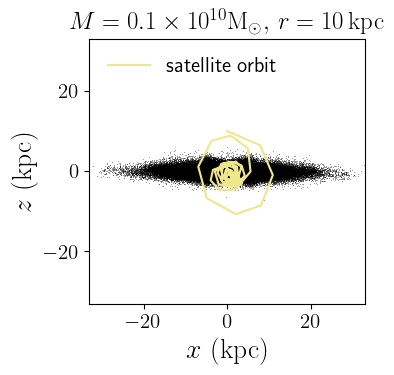

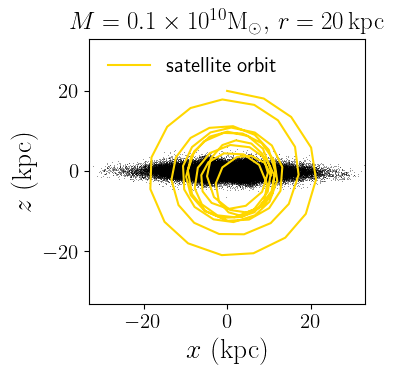

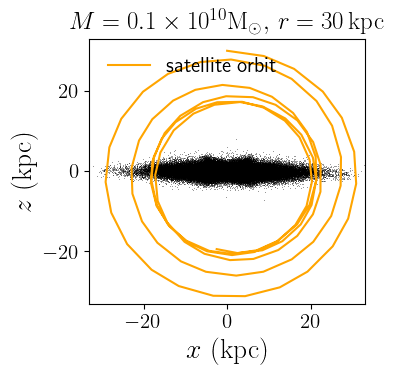

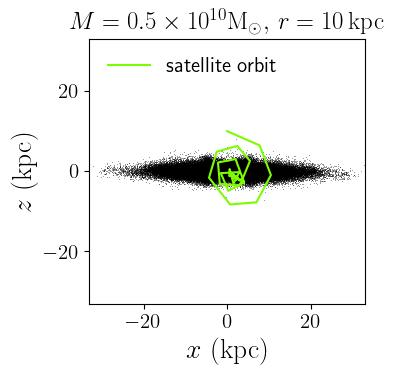

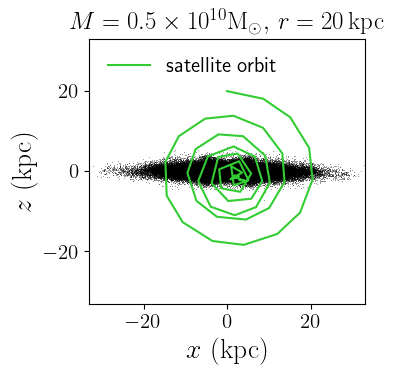

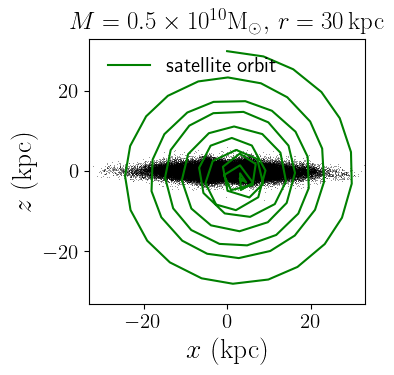

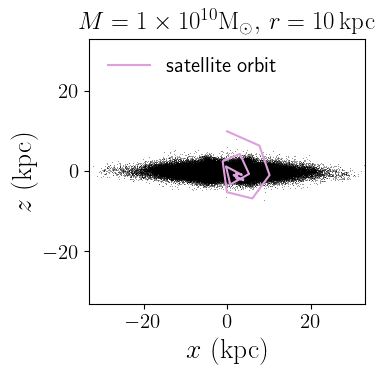

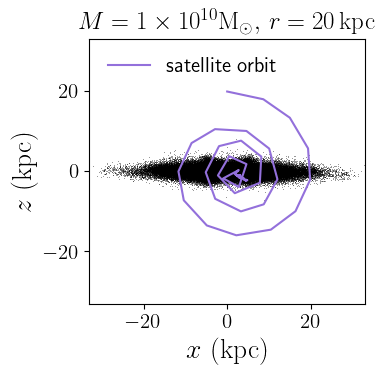

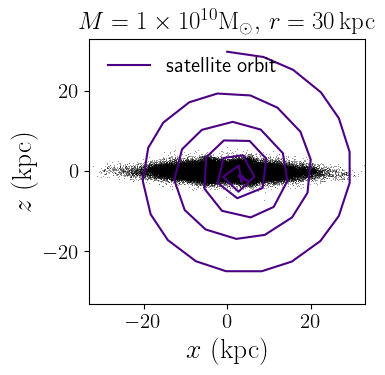

In [42]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_10, cm_z_01_10, color='khaki', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.1-10_poster.pdf')
        
    if i == 1:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_20, cm_z_01_20, color='gold', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.1-20_poster.pdf')
    
    if i == 2:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_01_30, cm_z_01_30, color='orange', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.1-30_poster.pdf')
        
    if i == 3:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_10, cm_z_05_10, color='lawngreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.5-10_poster.pdf')
        
    if i == 4:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_20, cm_z_05_20, color='limegreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.5-20_poster.pdf')
    
    if i == 5:   
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_05_30, cm_z_05_30, color='green', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-0.5-30_poster.pdf')
    
    if i == 6: 
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_10, cm_z_1_10, color='plum', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-10_poster.pdf')
        
    if i == 7: 
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_20, cm_z_1_20, color='mediumpurple', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-20_poster.pdf')
        
    if i == 8: 
        plt.figure(figsize=[4,4])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(cm_y_1_30, cm_z_1_30, color='indigo', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$', fontsize=20)
        plt.ylabel(r'$z~({\rm kpc})$', fontsize=20)
        plt.legend(loc='upper left', frameon=False, fontsize=15)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-30_poster.pdf')

In [27]:
import unsiotools.unsiotools.simulations.cfalcon as falcon
from mpl_toolkits.axes_grid1 import host_subplot

In [28]:
x_01_10 = np.empty(n_snapshots)
y_01_10 = np.empty(n_snapshots)
z_01_10 = np.empty(n_snapshots)

x_01_20 = np.empty(n_snapshots)
y_01_20 = np.empty(n_snapshots)
z_01_20 = np.empty(n_snapshots)

x_01_30 = np.empty(n_snapshots)
y_01_30 = np.empty(n_snapshots)
z_01_30 = np.empty(n_snapshots)

x_05_10 = np.empty(n_snapshots)
y_05_10 = np.empty(n_snapshots)
z_05_10 = np.empty(n_snapshots)

x_05_20 = np.empty(n_snapshots)
y_05_20 = np.empty(n_snapshots)
z_05_20 = np.empty(n_snapshots)

x_05_30 = np.empty(n_snapshots)
y_05_30 = np.empty(n_snapshots)
z_05_30 = np.empty(n_snapshots)

x_1_10 = np.empty(n_snapshots)
y_1_10 = np.empty(n_snapshots)
z_1_10 = np.empty(n_snapshots)

x_1_20 = np.empty(n_snapshots)
y_1_20 = np.empty(n_snapshots)
z_1_20 = np.empty(n_snapshots)

x_1_30 = np.empty(n_snapshots)
y_1_30 = np.empty(n_snapshots)
z_1_30 = np.empty(n_snapshots)

In [29]:
for p, path in enumerate(paths):
    snapshot = path + 'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    x_new_disk, y_new_disk, z_new_disk = shift_com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
        
    for j in range (0, n_snapshots):
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        #ler info satélite
        f_bndry = f['PartType5']

        x_bndry = np.array(f_bndry['Coordinates'][:,0])
        y_bndry = np.array(f_bndry['Coordinates'][:,1])
        z_bndry = np.array(f_bndry['Coordinates'][:,2])
        m_bndry = np.array(f_bndry['Masses'])

        if p == 0:
            x_01_10[j], y_01_10[j], z_01_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 1:
            x_01_20[j], y_01_20[j], z_01_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 2:
            x_01_30[j], y_01_30[j], z_01_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 3:
            x_05_10[j], y_05_10[j], z_05_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 4:
            x_05_20[j], y_05_20[j], z_05_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 5:
            x_05_30[j], y_05_30[j], z_05_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 6:
            x_1_10[j], y_1_10[j], z_1_10[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 7:
            x_1_20[j], y_1_20[j], z_1_20[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)
            
        if p == 8:
            x_1_30[j], y_1_30[j], z_1_30[j] = find_peak(x=x_bndry, y=y_bndry, z=z_bndry, m=m_bndry)

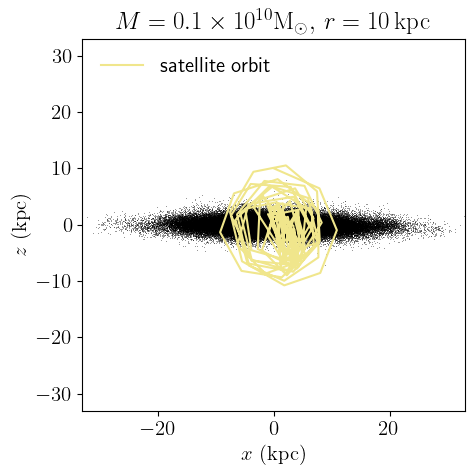

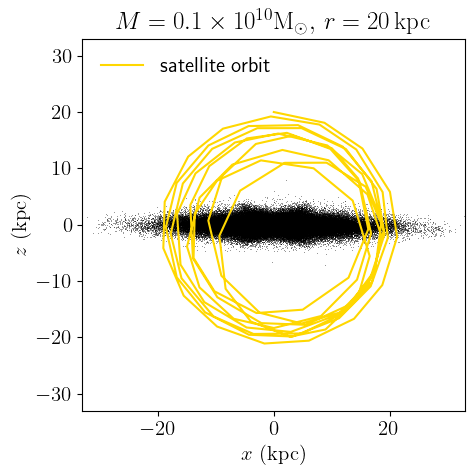

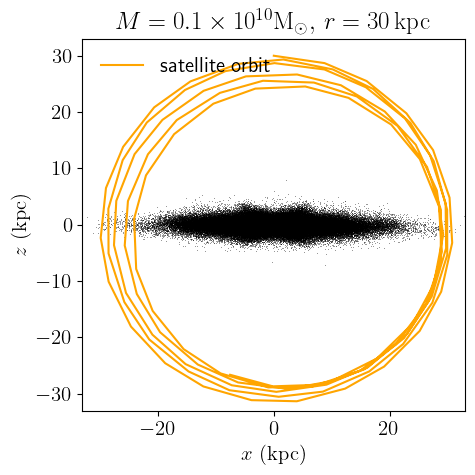

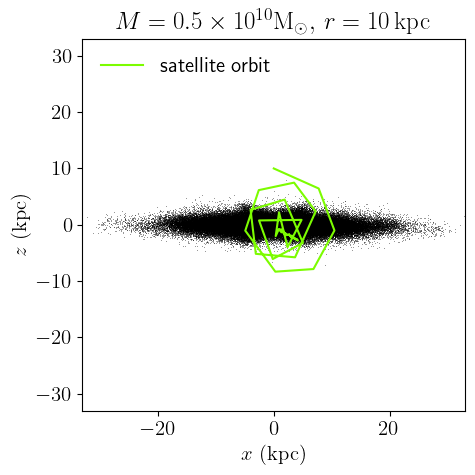

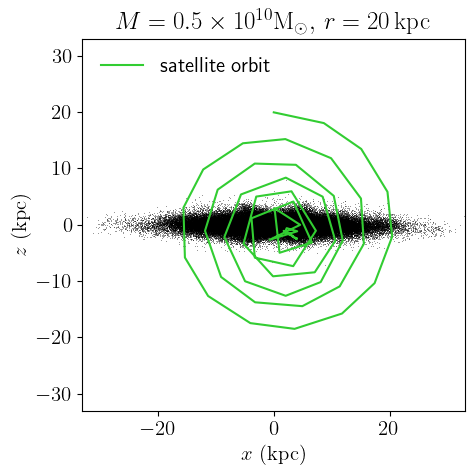

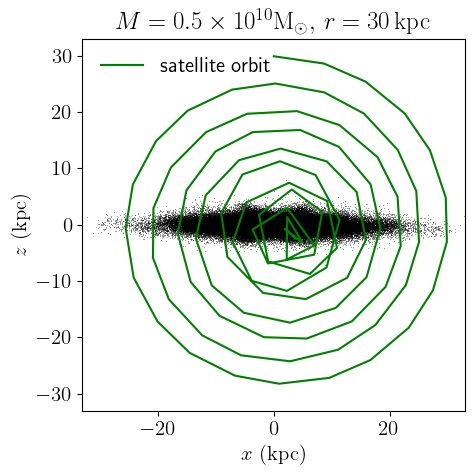

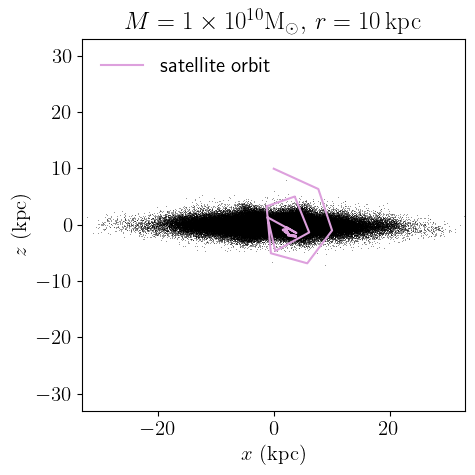

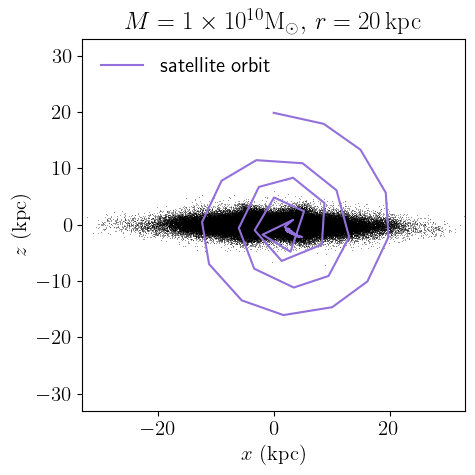

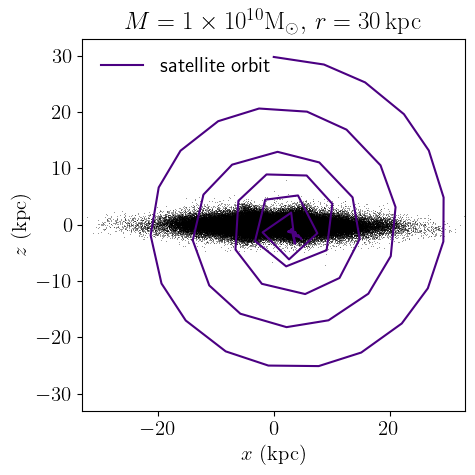

In [30]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_10, z_01_10, color='khaki', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-01-10.png')
        
    if i == 1:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_20, z_01_20, color='gold', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-01-20.png')
    
    if i == 2:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_01_30, z_01_30, color='orange', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-01-30.png')
        
    if i == 3:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_10, z_05_10, color='lawngreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-05-10.png')
        
    if i == 4:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_20, z_05_20, color='limegreen', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-05-20.png')
    
    if i == 5:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_05_30, z_05_30, color='green', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-05-30.png')
    
    if i == 6: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_10, z_1_10, color='plum', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_20, z_1_20, color='mediumpurple', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(x_disk, z_disk, 'k,', alpha=0.4)
        plt.plot(y_1_30, z_1_30, color='indigo', label='satellite orbit')
        plt.xlabel(r'$x~({\rm kpc})$')
        plt.ylabel(r'$z~({\rm kpc})$')
        plt.legend(loc='upper left', frameon=False)
        plt.ylim(-33, 33)
        plt.xlim(-33, 33)
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        #plt.savefig('orbita-1-30.png')

In [31]:
#arrays raios
r_01_10 = np.empty(n_snapshots)
r_01_20 = np.empty(n_snapshots)
r_01_30 = np.empty(n_snapshots)

r_05_10 = np.empty(n_snapshots)
r_05_20 = np.empty(n_snapshots)
r_05_30 = np.empty(n_snapshots)

r_1_10 = np.empty(n_snapshots)
r_1_20 = np.empty(n_snapshots)
r_1_30 = np.empty(n_snapshots)

R_01_10 = np.empty(n_snapshots)
R_01_20 = np.empty(n_snapshots)
R_01_30 = np.empty(n_snapshots)

R_05_10 = np.empty(n_snapshots)
R_05_20 = np.empty(n_snapshots)
R_05_30 = np.empty(n_snapshots)

R_1_10 = np.empty(n_snapshots)
R_1_20 = np.empty(n_snapshots)
R_1_30 = np.empty(n_snapshots)

In [32]:
for p, path in enumerate(paths):

    for j in range (0, n_snapshots): 
        index = str(j).zfill(3)
        snapshot = path + f'snapshot_{index}.hdf5'

        #ler snapshot
        f = h5py.File(snapshot, 'r')
        
        if p == 0:
            r_01_10[j] = np.sqrt(x_01_10[j]**2+y_01_10[j]**2+z_01_10[j]**2)
            R_01_10[j] = np.sqrt(y_01_10[j]**2+z_01_10[j]**2)
            
        if p == 1:
            r_01_20[j] = np.sqrt(x_01_20[j]**2+y_01_20[j]**2+z_01_20[j]**2)
            R_01_20[j] = np.sqrt(y_01_20[j]**2+z_01_20[j]**2)
        
        if p == 2:
            r_01_30[j] = np.sqrt(x_01_30[j]**2+y_01_30[j]**2+z_01_30[j]**2)
            R_01_30[j] = np.sqrt(y_01_30[j]**2+z_01_30[j]**2)
            
        if p == 3:
            r_05_10[j] = np.sqrt(x_05_10[j]**2+y_05_10[j]**2+z_05_10[j]**2)
            R_05_10[j] = np.sqrt(y_05_10[j]**2+z_05_10[j]**2)
            
        if p == 4:
            r_05_20[j] = np.sqrt(x_05_20[j]**2+y_05_20[j]**2+z_05_20[j]**2)
            R_05_20[j] = np.sqrt(y_05_20[j]**2+z_05_20[j]**2)
            
        if p == 5:
            r_05_30[j] = np.sqrt(x_05_30[j]**2+y_05_30[j]**2+z_05_30[j]**2)
            R_05_30[j] = np.sqrt(y_05_30[j]**2+z_05_30[j]**2)
            
        if p == 6:
            r_1_10[j] = np.sqrt(x_1_10[j]**2+y_1_10[j]**2+z_1_10[j]**2)
            R_1_10[j] = np.sqrt(y_1_10[j]**2+z_1_10[j]**2)
            
        if p == 7:
            r_1_20[j] = np.sqrt(x_1_20[j]**2+y_1_20[j]**2+z_1_20[j]**2)
            R_1_20[j] = np.sqrt(y_1_20[j]**2+z_1_20[j]**2)
            
        if p == 8:
            r_1_30[j] = np.sqrt(x_1_30[j]**2+y_1_30[j]**2+z_1_30[j]**2)
            R_1_30[j] = np.sqrt(y_1_30[j]**2+z_1_30[j]**2)

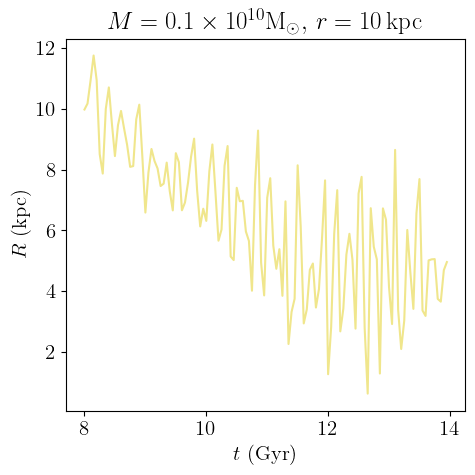

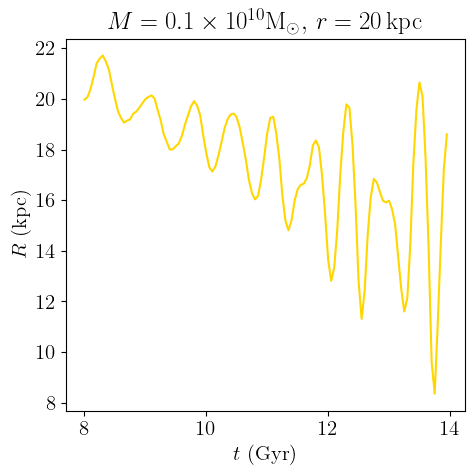

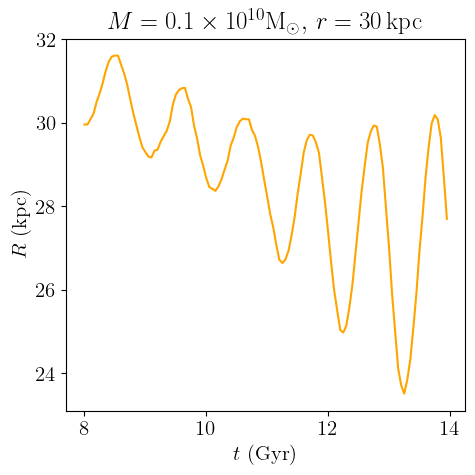

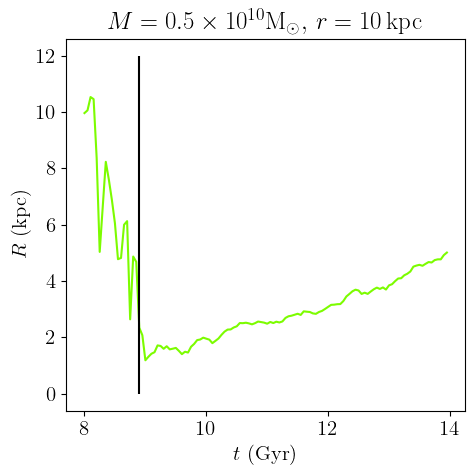

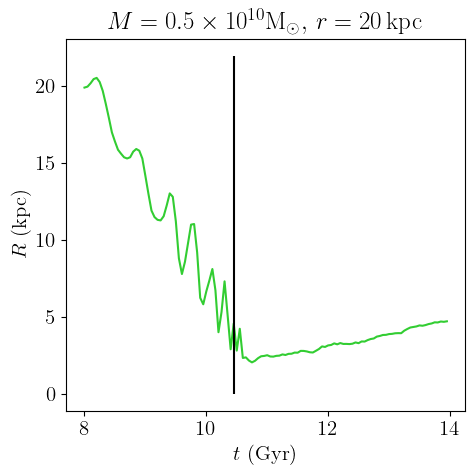

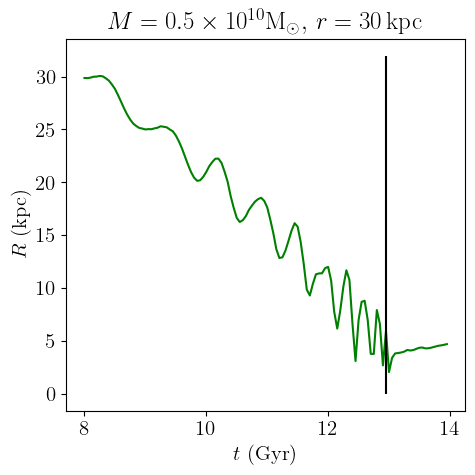

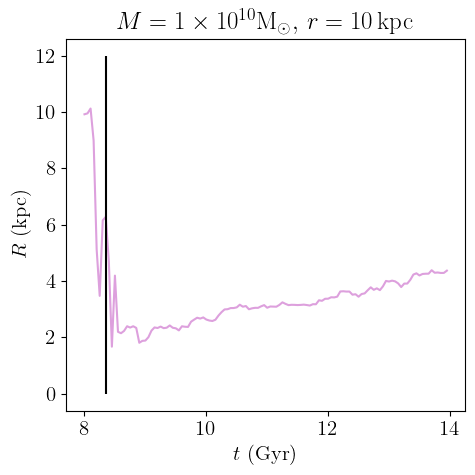

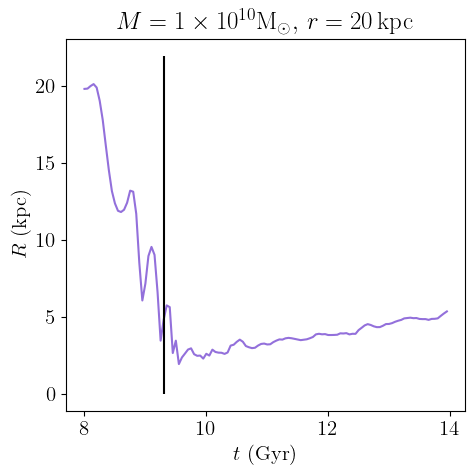

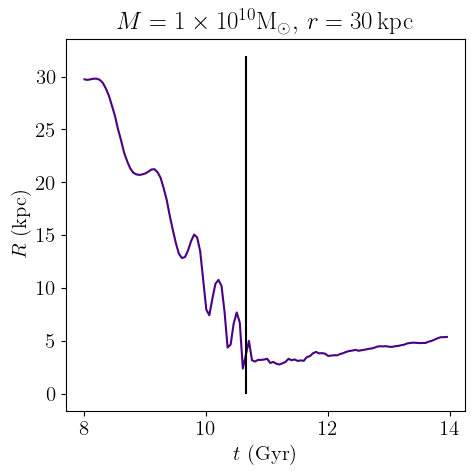

In [51]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_10, R_01_10, color='khaki')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-01-10.png')
        
    if i == 1:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_20, R_01_20, color='gold')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-01-20.png')
    
    if i == 2:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_01_30, R_01_30, color='orange')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-01-30.png')
        
    if i == 3:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_10, R_05_10, color='lawngreen')
        plt.vlines(t_05_10, 0, 12, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-05-10.png')
        
    if i == 4:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_20, R_05_20, color='limegreen')
        plt.vlines(t_05_20, 0, 22, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-05-20.png')
    
    if i == 5:   
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_05_30, R_05_30, color='green')
        plt.vlines(t_05_30, 0, 32, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-05-30.png')
    
    if i == 6: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_10, R_1_10, color='plum')
        plt.vlines(t_1_10, 0, 12, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_20, R_1_20, color='mediumpurple')
        plt.vlines(t_1_20, 0, 22, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[5,5])#, dpi=200)
        plt.plot(time_1_30, R_1_30, color='indigo')
        plt.vlines(t_1_30, 0, 32, 'black')
        plt.ylabel(r'$R~({\rm kpc})$')
        plt.xlabel(r'$t~({\rm Gyr})$')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('R-1-30.png')

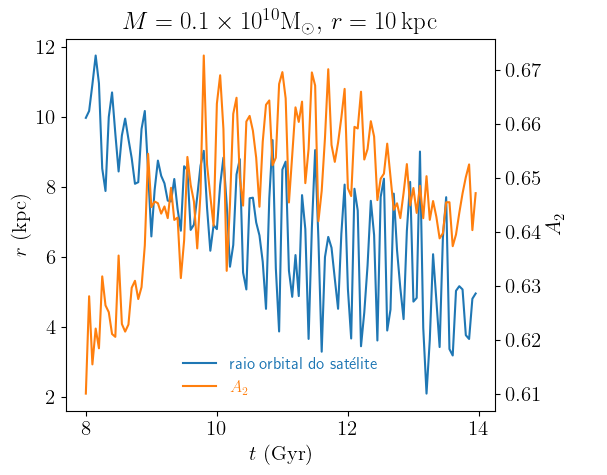

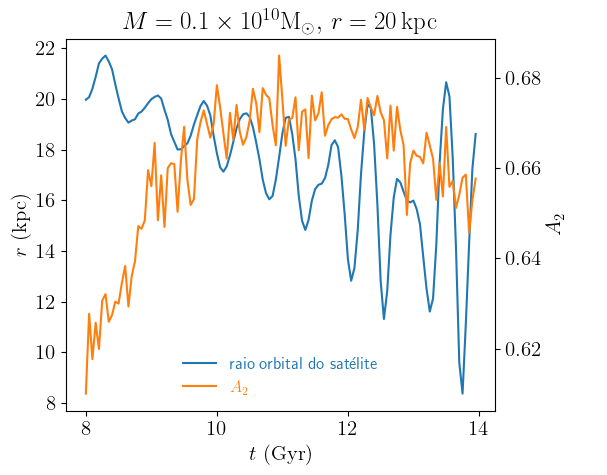

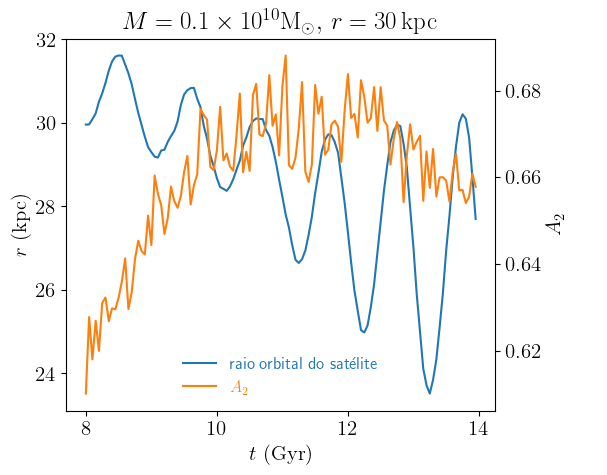

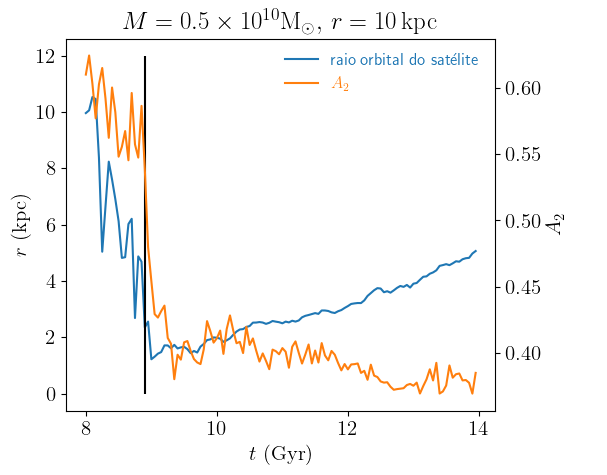

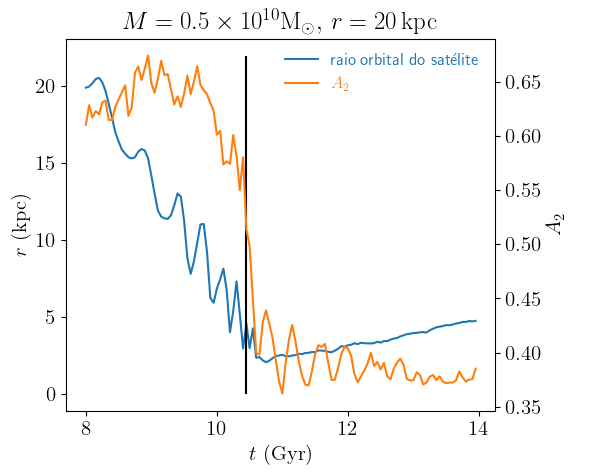

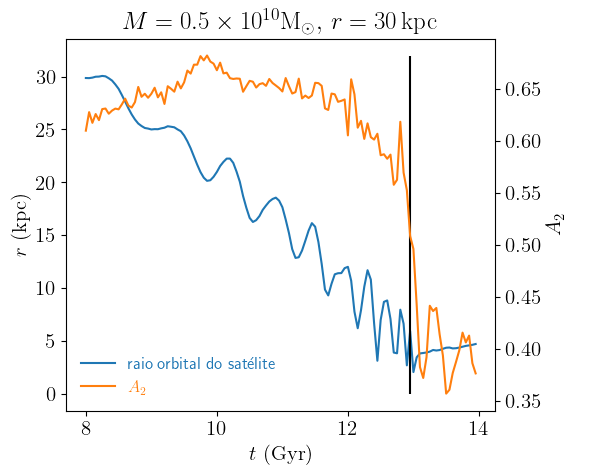

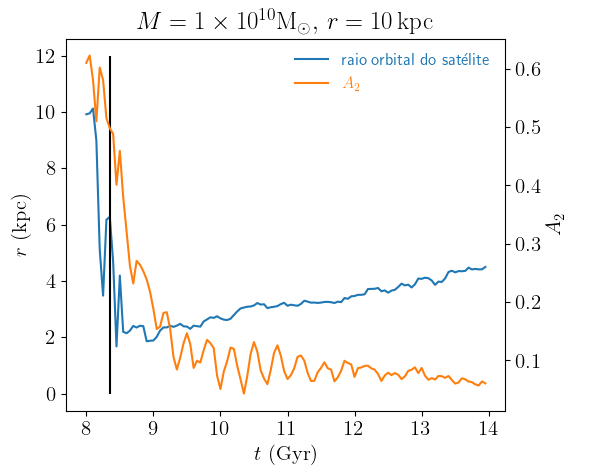

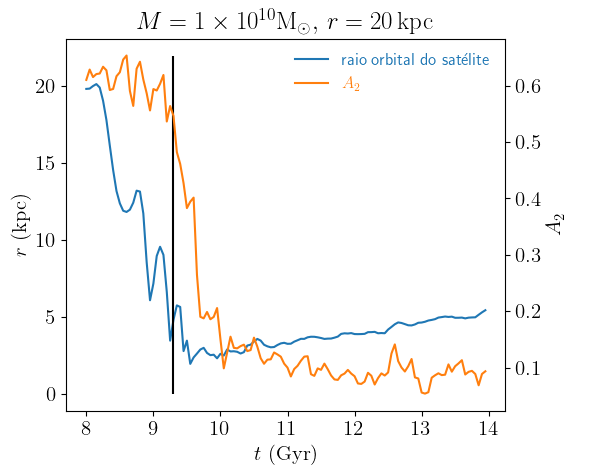

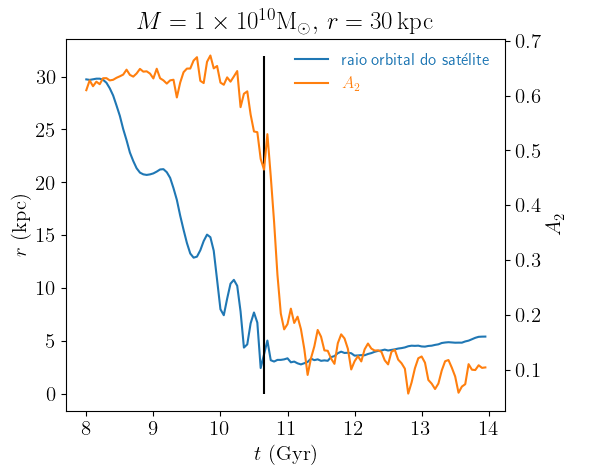

In [52]:
for i in range (0, 9):
    if i == 0:   
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_01_10, r_01_10, label='raio orbital do satélite')
        p2, = par.plot(time_01_10, A2_01_10, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())
        
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-01-10.png')
        
    if i == 1:
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_01_20, r_01_20, label='raio orbital do satélite')
        p2, = par.plot(time_01_20, A2_01_20, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())
        
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-01-20.png')
    
    if i == 2:
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_01_30, r_01_30, label='raio orbital do satélite')
        p2, = par.plot(time_01_30, A2_01_30, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())
        
        plt.title(r'$ M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-01-30.png')
        
    if i == 3: 
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_05_10, r_05_10, label='raio orbital do satélite')
        p2, = par.plot(time_05_10, A2_05_10, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_05_10, 0, 12, 'black')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-05-10.png')
        
    if i == 4:
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_05_20, r_05_20, label='raio orbital do satélite')
        p2, = par.plot(time_05_20, A2_05_20, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_05_20, 0, 22, 'black')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-05-20.png')
    
    if i == 5:
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_05_30, r_05_30, label='raio orbital do satélite')
        p2, = par.plot(time_05_30, A2_05_30, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_05_30, 0, 32, 'black')
        plt.title(r'$ M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-05-30.png')
    
    if i == 6: 
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_1_10, r_1_10, label='raio orbital do satélite')
        p2, = par.plot(time_1_10, A2_1_10, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_1_10, 0, 12, 'black')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-1-10.png')
        
    if i == 7: 
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_1_20, r_1_20, label='raio orbital do satélite')
        p2, = par.plot(time_1_20, A2_1_20, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_1_20, 0, 22, 'black')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-1-20.png')
        
    if i == 8: 
        plt.figure(figsize=[6,5])
        host = host_subplot(111)
        par = host.twinx()
        
        host.set_xlabel(r'$t~({\rm Gyr})$')
        host.set_ylabel(r'$r~({\rm kpc})$')
        par.set_ylabel('$A_2$')
        
        p1, = host.plot(time_1_30, r_1_30, label='raio orbital do satélite')
        p2, = par.plot(time_1_30, A2_1_30, label='$A_2$')
        
        host.legend(frameon=False, labelcolor="linecolor", fontsize=12)
        host.yaxis.get_label()#.set_color(p1.get_color())
        par.yaxis.get_label()#.set_color(p2.get_color())

        plt.vlines(t_1_30, 0, 32, 'black')
        plt.title(r'$ M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$')
        plt.tight_layout()
        plt.savefig('r-A2-1-30.png')

### Mapas de altura e velocidade vertical

In [16]:
#figuras para o texto
plt.rcParams['figure.figsize'  ] = (3.5,1.4)
plt.rcParams['font.size'       ] = 7
plt.rcParams['legend.fontsize' ] = 7
plt.rcParams['legend.frameon'  ] = False
plt.rcParams['font.family'     ] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['xtick.direction' ] = 'in'
plt.rcParams['ytick.direction' ] = 'in'
plt.rcParams['xtick.top'       ] = True
plt.rcParams['ytick.right'     ] = True
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 0
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['xtick.major.width'] = 0.75
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.major.width'] = 0.75
plt.rcParams['ytick.minor.width'] = 0

In [48]:
#snapshots=[160,220,280] #galaxia barrada
snapshots=[0,60,120] #galaxia barrada + satelite

Qlist = []
Qlist1 = []
    
for s, snap in enumerate(snapshots): 
    index = str(snap).zfill(3)
    snapshot = path_1_20 + f'snapshot_{index}.hdf5' 
    #substituir o path, por enquanto só dá um de cada vez

    #ler snapshot
    f = h5py.File(snapshot, 'r')

    #ler info disk e stars
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    m_disk = np.array(f_disk['Masses'])
    Ndisk = len(np.array(f_disk['ParticleIDs']))
    
        
    #corrigir posição - centro de massa - disk
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

    #corrigir posição - momento angular - disk
    theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
    x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
    x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

    #corrigir theta bar
    thetas = theta_bar(m=m_disk, x=x, y=y, Rmax=10.0)
    x_new_disk2, y_new_disk2 = corr_theta_b(N=Ndisk, x=x, y=y, theta=thetas)
    
    #mapas de posição e velocidade
    Nbins = 80

    Rmax =  32.0 #kpc
    xmin = ymin = -Rmax
    xmax = ymax = Rmax

    results, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, z, 
                                    statistic='std', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])

    results1, xb, yb, binnum = stats.binned_statistic_2d(x_new_disk2, y_new_disk2, vz, 
                                    statistic='std', bins=Nbins, range=[[xmin,xmax],[ymin,ymax]])
    #mudar para statistic='std' para desvio de posição e velocidades

    extent = [xb[0], xb[-1], yb[0], yb[-1]]

    Q = results
    Qlist.append(Q)
    Q1 = results1
    Qlist1.append(Q1)

/tmp/ipykernel_19361/1081174152.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_19361/1081174152.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


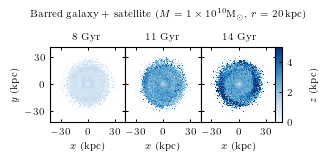

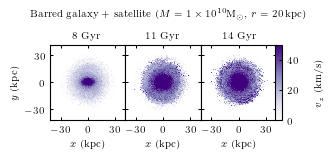

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# ax1.set_title("8 Gyr", fontsize=6.5)
# ax2.set_title("12 Gyr", fontsize=6.5)
# ax3.set_title("14 Gyr", fontsize=6.5)

ax1.set_title(" ", fontsize=6.5)
ax2.set_title(" ", fontsize=6.5)
ax3.set_title(" ", fontsize=6.5)

# im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest',
#                  vmin=0, vmax=5.0)
# im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest', 
#                  vmin=0, vmax=5.0)
# im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="coolwarm", interpolation='nearest', 
#                  vmin=0, vmax=5.0)

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest',
                 vmin=0, vmax=5.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
                 vmin=0, vmax=5.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
                 vmin=0, vmax=5.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-42,42)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-42,42)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

#cax1 = fig.add_axes([0.85, 0.27, 0.025, 0.54])
cax1 = fig.add_axes([0.82, 0.28, 0.020, 0.54])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$z$ (kpc)', labelpad=12)

fig.subplots_adjust(left=0.47, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()
# text = 'Barred galaxy + satellite ' + r'($M=0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r=30 \, \mathrm{kpc}$)'
# plt.text(-145, 2.7, text, fontsize=7)
# #plt.text(-85, 2.7, text, fontsize=7)
# text1 = '8 Gyr'
# plt.text(-116, 2.2, text1, fontsize=7)
# text2 = '11 Gyr'
# plt.text(-75, 2.2, text2, fontsize=7)
# text3 = '14 Gyr'
# plt.text(-32, 2.2, text3, fontsize=7)

text = 'Barred galaxy + satellite ' + r'($M=1 \times 10^{10}\mathrm{{M}_\odot}, \,r=20 \, \mathrm{kpc}$)'
plt.text(-35, 6.9, text, fontsize=7)
text1 = '8 Gyr'
plt.text(-29, 5.5, text1, fontsize=7)
text2 = '11 Gyr'
plt.text(-18.5, 5.5, text2, fontsize=7)
text3 = '14 Gyr'
plt.text(-7.5, 5.5, text3, fontsize=7)

plt.savefig('std-b-1-20.png', dpi=200)


#_____________________________#

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# ax1.set_title("8 Gyr")
# ax2.set_title("12 Gyr")
# ax3.set_title("14 Gyr")

ax1.set_title(" ", fontsize=6.5)
ax2.set_title(" ", fontsize=6.5)
ax3.set_title(" ", fontsize=6.5)

# im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest',
#                  vmin=0.0, vmax=50.0)
# im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
#                  vmin=0.0, vmax=50.0)
# im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
#                  vmin=0.0, vmax=50.0)

im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest',
                 vmin=0.0, vmax=50.0)
im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest', 
                 vmin=0.0, vmax=50.0)
im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest', 
                 vmin=0.0, vmax=50.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-42,42)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-42,42)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

cax1 = fig.add_axes([0.82, 0.28, 0.020, 0.54])
cb1  = plt.colorbar(im1, cax=cax1)
cb1.set_label(r'$v_z$ (km/s)', labelpad=12)

fig.subplots_adjust(left=0.47, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()

text = 'Barred galaxy + satellite ' + r'($M=1 \times 10^{10}\mathrm{{M}_\odot}, \,r=20 \, \mathrm{kpc}$)'
plt.text(-35, 67.8, text, fontsize=7)
text1 = '8 Gyr'
plt.text(-29, 54.5, text1, fontsize=7)
text2 = '11 Gyr'
plt.text(-18.5, 54.5, text2, fontsize=7)
text3 = '14 Gyr'
plt.text(-7.5, 54.5, text3, fontsize=7)

plt.savefig('stdvz-b-1-20.png', dpi=200)

/tmp/ipykernel_19361/2163648018.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_19361/2163648018.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


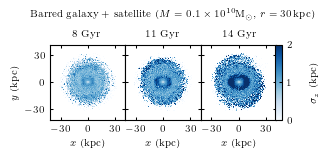

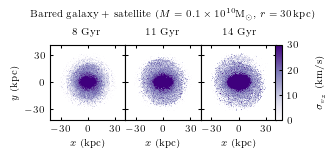

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# ax1.set_title("8 Gyr", fontsize=6.5)
# ax2.set_title("12 Gyr", fontsize=6.5)
# ax3.set_title("14 Gyr", fontsize=6.5)

ax1.set_title(" ", fontsize=6.5)
ax2.set_title(" ", fontsize=6.5)
ax3.set_title(" ", fontsize=6.5)

# im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest',
#                  vmin=-2.0, vmax=2.0)
# im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
#                  vmin=-2.0, vmax=2.0)
# im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
#                  vmin=-2.0, vmax=2.0)

im1 = ax1.imshow(Qlist[0].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest',
                 vmin=0, vmax=2.0)
im2 = ax2.imshow(Qlist[1].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
                 vmin=0, vmax=2.0)
im3 = ax3.imshow(Qlist[2].T, extent=extent, origin='lower', cmap="Blues", interpolation='nearest', 
                 vmin=0, vmax=2.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-42,42)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-42,42)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

#cax1 = fig.add_axes([0.85, 0.27, 0.025, 0.54])
cax1 = fig.add_axes([0.82, 0.28, 0.020, 0.54])
cb1  = plt.colorbar(im1, cax=cax1)
#cb1.set_label(r'$z$ (kpc)', labelpad=12)
cb1.set_label(r'$\sigma_z$ (kpc)', labelpad=12)

fig.subplots_adjust(left=0.47, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()
# text = 'Barred galaxy + satellite ' + r'($M=0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r=30 \, \mathrm{kpc}$)'
# plt.text(-145, 2.7, text, fontsize=7)
# #plt.text(-85, 2.7, text, fontsize=7)
# text1 = '8 Gyr'
# plt.text(-116, 2.2, text1, fontsize=7)
# text2 = '11 Gyr'
# plt.text(-75, 2.2, text2, fontsize=7)
# text3 = '14 Gyr'
# plt.text(-32, 2.2, text3, fontsize=7)

text = 'Barred galaxy + satellite ' + r'($M=0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r=30 \, \mathrm{kpc}$)'
plt.text(-35, 2.7, text, fontsize=7)
text1 = '8 Gyr'
plt.text(-29, 2.2, text1, fontsize=7)
text2 = '11 Gyr'
plt.text(-18.5, 2.2, text2, fontsize=7)
text3 = '14 Gyr'
plt.text(-7.5, 2.2, text3, fontsize=7)

plt.savefig('std-b-01-30.png', dpi=200)


#_____________________________#

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# ax1.set_title("8 Gyr")
# ax2.set_title("12 Gyr")
# ax3.set_title("14 Gyr")

ax1.set_title(" ", fontsize=6.5)
ax2.set_title(" ", fontsize=6.5)
ax3.set_title(" ", fontsize=6.5)

# im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest',
#                  vmin=-30.0, vmax=30.0)
# im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
#                  vmin=-30.0, vmax=30.0)
# im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="PuOr", interpolation='nearest', 
#                  vmin=-30.0, vmax=30.0)

im1 = ax1.imshow(Qlist1[0].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest',
                 vmin=0.0, vmax=30.0)
im2 = ax2.imshow(Qlist1[1].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest', 
                 vmin=0.0, vmax=30.0)
im3 = ax3.imshow(Qlist1[2].T, extent=extent, origin='lower', cmap="Purples", interpolation='nearest', 
                 vmin=0.0, vmax=30.0)

for ax in fig.get_axes():
    ax.set_xlabel(r'$x$ (kpc)')  
    ax.set_ylabel(r'$y$ (kpc)')
    ax.set_xlim(-42,42)
    ax.set_xticks(np.arange(-30,31,30))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylim(-42,42)
    ax.set_yticks(np.arange(-30,31,30))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.label_outer()
ax3.set_xticks(np.arange(-30,31,30))
ax1.set_yticks(np.arange(-30,31,30))

fig.subplots_adjust(right=0.9)

cax1 = fig.add_axes([0.82, 0.28, 0.020, 0.54])
cb1  = plt.colorbar(im1, cax=cax1)
#cb1.set_label(r'$v_z$ (km/s)', labelpad=12)
cb1.set_label(r'$\sigma_{v_z}$ (km/s)', labelpad=12)

fig.subplots_adjust(left=0.47, bottom=0.5, top=1.8, right=3.0, hspace=0.0, wspace=0.0)
plt.tight_layout()

text = 'Barred galaxy + satellite ' + r'($M=0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r=30 \, \mathrm{kpc}$)'
plt.text(-35, 40.5, text, fontsize=7)
text1 = '8 Gyr'
plt.text(-29, 34, text1, fontsize=7)
text2 = '11 Gyr'
plt.text(-18.5, 34, text2, fontsize=7)
text3 = '14 Gyr'
plt.text(-7.5, 34, text3, fontsize=7)

plt.savefig('stdvz-b-01-30.png', dpi=200)

__________________________